In [7]:
import os
import random
import matplotlib.pyplot as plt

In [25]:
def load_data(filename: str):
    file = open(filename, 'r')
    text = file.read()
    lines = text.split('\n')
    times = []
    for line in lines:
        if line:
            timestr = line.split('\t')[1]
            minute, second = timestr.split('m')
            minute = int(minute)
            second = float(second[:-1])
            times.append(60 * minute + second)
    file.close()
    return times

In [26]:
def get_random_rgb_color():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)

In [27]:
def plot_times(num_qubits, ax, filename, label):
    try:
        data = load_data(filename)
        color = get_random_rgb_color()
        ax.semilogy(num_qubits[:len(data)], data, label=label, color=color)
        ax.scatter(num_qubits[:len(data)], data, color=color)
    except:
        pass

In [36]:
def plot_test(num_qubits, test_dir, test_name):
    fig, ax = plt.subplots()

    plot_times(num_qubits, ax, os.path.join(test_dir, 'haskell.txt'), 'Haskell')
    plot_times(num_qubits, ax, os.path.join(test_dir, 'qiskit_normal.txt'), 'Qiskit (normal)')
    plot_times(num_qubits, ax, os.path.join(test_dir, 'cirq_normal.txt'), 'Cirq (normal)')
    plot_times(num_qubits, ax, os.path.join(test_dir, 'cirq_queued.txt'), 'Cirq (queued)')
    plot_times(num_qubits, ax, os.path.join(test_dir, 'qiskit_queued.txt'), 'Qiskit (queued)')
    
    ax.set_title(test_name)
    ax.legend()
    ax.set_xlabel('Qubits')
    ax.set_ylabel('Simulation time (seconds)')
    
    plt.show()

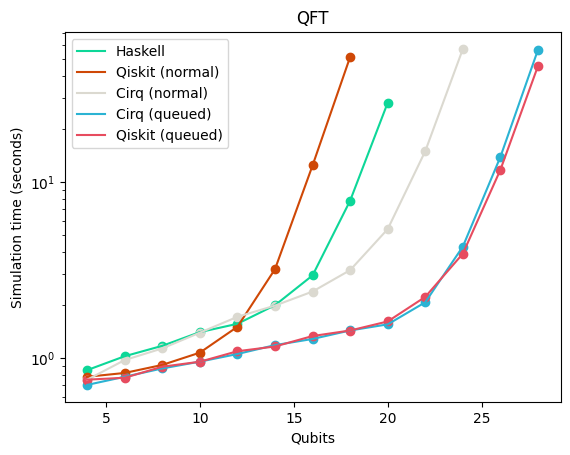

In [29]:
plot_test(list(range(4, 30, 2)), 'results/qft', 'QFT')

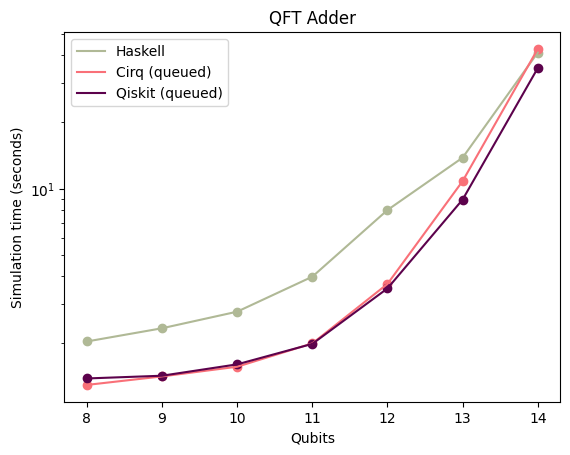

In [30]:
plot_test(list(range(8, 15)), 'results/qftadder', 'QFT Adder')

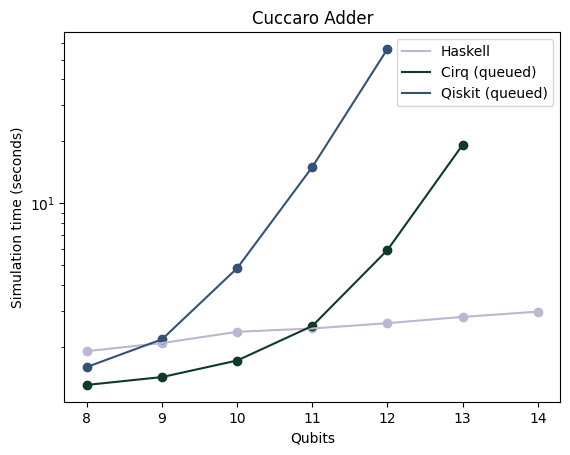

In [31]:
plot_test(list(range(8, 15)), 'results/cuccaroadder', 'Cuccaro Adder')

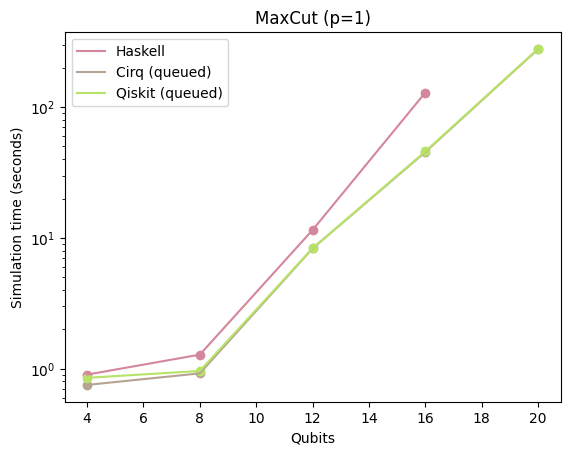

In [45]:
plot_test(list(range(4, 24, 4)), 'results/maxcut/p1', 'MaxCut (p=1)')

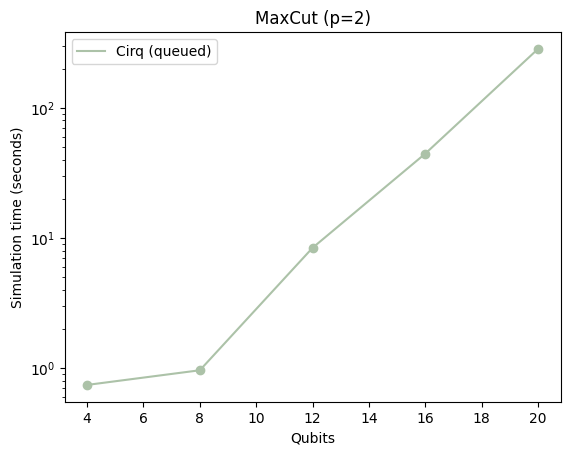

In [46]:
plot_test(list(range(4, 24, 4)), 'results/maxcut/p2', 'MaxCut (p=2)')